In [1]:
# Import libraries section

import chart_studio
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as ply
import psycopg2
import seaborn as sns
import spotipy
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from spotipy.oauth2 import SpotifyClientCredentials
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id='64c7e99146a749da88cbad6d9b55183c', client_secret='48bb5ebd778f4223a2b0cdd3e9a3a66d')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
conn = psycopg2.connect("dbname='phmcuozt' user='phmcuozt' host='drona.db.elephantsql.com' password='Hl4xzpVOZxiQ9af4kH5bavoEHIx7z3hn'")
songs = pd.read_sql_query('SELECT * FROM spotify_table', conn)
conn.close()

In [ ]:
# chart_studio.tools.set_credentials_file(username='CodingDuckmx', api_key='BJDTaHirN1qxM6uaTXhS')

In [5]:
# songs = songs.drop(labels='Unnamed: 0', axis=1)
print(songs.shape)
songs.head()

(58223, 16)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Miley Cyrus,Party In The U.S.A.,5Q0Nhxo0l2bP3pNjpGJwV1,74,0.652,0.698,10,-4.667,0,0.0420,0.00112,0.000115,0.0886,0.470,96.021,4
1,Kid Cudi,Day 'N' Nite (nightmare),5FEXPoPnzueFJQCPRIrC3c,74,0.871,0.440,11,-6.250,0,0.0761,0.49900,0.000004,0.1140,0.799,137.996,4
2,Owl City,Fireflies,3DamFFqW32WihKkTVlwTYQ,80,0.513,0.661,3,-6.800,1,0.0439,0.02740,0.000000,0.1180,0.461,180.119,4
3,Cage The Elephant,Ain't No Rest for the Wicked,3Pzh926pXggbMe2ZpXyMV7,74,0.634,0.849,0,-7.075,1,0.1050,0.04380,0.000000,0.3630,0.919,156.004,4
4,Kid Cudi,Pursuit Of Happiness (Nightmare),5iSEsR6NKjlC9SrIJkyL3k,72,0.630,0.605,0,-8.951,1,0.0414,0.48400,0.000093,0.2980,0.266,115.277,4


In [6]:
songs = songs.drop_duplicates(['track_id'])
songs.shape

(58223, 16)

In [7]:

numerical_features = ['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence']

scaled_data = scale(songs[numerical_features])

songs[numerical_features] = scaled_data


In [8]:
features = ['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence','popularity']
songs[features] = songs[features].astype(float)
songs_features = songs[features].astype(float)
songs_features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,-0.913554,0.427838,0.328196,-0.380443,1.333185,-0.637529,0.758164,-1.489051,-0.463995,-0.784931,0.224847,-0.144799,74.0
1,0.708911,1.661430,-0.749092,-0.380894,1.614584,-0.483960,0.438619,-1.489051,-0.126802,0.569331,0.224847,1.134665,74.0
2,-0.827914,-0.355127,0.173701,-0.380911,-0.636603,-0.459776,0.327596,0.671569,-0.445207,1.928369,0.224847,-0.179800,80.0
3,-0.774471,0.326447,0.958702,-0.380911,-1.480798,1.021494,0.272085,0.671569,0.158971,1.150333,0.224847,1.601339,74.0
4,0.660030,0.303915,-0.060129,-0.380533,-1.480798,0.628504,-0.106605,0.671569,-0.469928,-0.163664,0.224847,-0.938145,72.0


In [9]:
#  Product of the vectors.

knn = Sequential()
knn.add(Dense(input_shape=(songs_features.shape[1],),
       units=songs.shape[0],
       activation='linear',
       use_bias=False))

knn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 58223)             756899    
Total params: 756,899
Trainable params: 756,899
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Normalize the vectors

def normalize(vectors):
    
    norm_vectors = np.linalg.norm(vectors, axis=1, keepdims=True)
    return (vectors / norm_vectors)

In [11]:
norm_songs_features = normalize(songs_features)
norm_songs_features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,-0.012337,0.005778,0.004432,-0.005138,0.018004,-0.008610,0.010239,-0.020109,-0.006266,-0.010600,0.003036,-0.001955,0.999348
1,0.009570,0.022429,-0.010113,-0.005142,0.021797,-0.006534,0.005921,-0.020102,-0.001712,0.007686,0.003035,0.015318,0.999006
2,-0.010344,-0.004437,0.002170,-0.004759,-0.007954,-0.005744,0.004093,0.008391,-0.005562,0.024093,0.002809,-0.002246,0.999519
3,-0.010457,0.004408,0.012944,-0.005143,-0.019993,0.013792,0.003674,0.009067,0.002146,0.015532,0.003036,0.021621,0.999134
4,0.009163,0.004219,-0.000835,-0.005283,-0.020557,0.008725,-0.001480,0.009323,-0.006524,-0.002272,0.003121,-0.013024,0.999527


In [12]:
# change the weights to the original matrix of features (of songs).

knn.set_weights([np.array(norm_songs_features.T)])
knn.get_weights()

[array([[-0.01233728,  0.00957036, -0.01034395, ..., -0.02851753,
          0.04059322, -0.03506643],
        [ 0.00577782,  0.02242945, -0.00443695, ..., -0.03646544,
          0.01114359, -0.04163326],
        [ 0.00443219, -0.0101128 ,  0.00217022, ...,  0.04802181,
         -0.05612413,  0.0336684 ],
        ...,
        [ 0.00303649,  0.00303545,  0.00280923, ...,  0.00699651,
         -0.08764107,  0.00860873],
        [-0.00195547,  0.01531808, -0.00224642, ..., -0.00958819,
         -0.02544815, -0.01030865],
        [ 0.99934787,  0.9990064 ,  0.999519  , ...,  0.99573743,
          0.99006927,  0.9954646 ]], dtype=float32)]

In [13]:
# Prediction time

random_choice = np.random.randint(1,songs.shape[0]+1)

sample_song = songs.loc[random_choice]
print('Artist:', sample_song[2])
print('Song name:', sample_song[1])

Artist: 22VdIZQfgXJea34mQxlt81
Song name: Can't Feel My Face


In [14]:
prediction = knn.predict(songs_features.loc[random_choice].values.reshape(1,songs_features.shape[1]))

In [15]:
# What if we have the track_id?

searched_song_id = '4hfiDzgfMqtcOiUQpZidBQ'

sp.track(searched_song_id)['artists'][0]['name']
sp.track(searched_song_id)['name']
searched_song_features = {'acousticness':sp.audio_features(searched_song_id)[0]['acousticness'],
                          'danceability':sp.audio_features(searched_song_id)[0]['danceability'],
                          'energy':sp.audio_features(searched_song_id)[0]['energy'],
                         'instrumentalness':sp.audio_features(searched_song_id)[0]['instrumentalness'],
                         'key':sp.audio_features(searched_song_id)[0]['key'],
                          'liveness':sp.audio_features(searched_song_id)[0]['liveness'],
                          'loudness':sp.audio_features(searched_song_id)[0]['loudness'],
                          'mode':sp.audio_features(searched_song_id)[0]['mode'],
                          'speechiness':sp.audio_features(searched_song_id)[0]['speechiness'],
                          'tempo':sp.audio_features(searched_song_id)[0]['tempo'],
                          'time_signature':sp.audio_features(searched_song_id)[0]['time_signature'],
                          'valence':sp.audio_features(searched_song_id)[0]['valence'],
                          'popularity': sp.track(searched_song_id)['popularity']}                         

searched_song_array = (pd.Series(searched_song_features).values / np.linalg.norm(pd.Series(searched_song_features).values)).reshape(1,songs_features.shape[1])

prediction = knn.predict(searched_song_array)

In [16]:
ten_most_similar_songs = songs.loc[prediction.argsort()[0][-11:]]
if (ten_most_similar_songs['track_id'] == searched_song_id).any():
    ten_most_similar_songs = ten_most_similar_songs.drop(labels=ten_most_similar_songs['track_id'][ten_most_similar_songs['track_id'] == searched_song_id].index[0], axis=0)
else:
    ten_most_similar_songs = ten_most_similar_songs[-10:]
ten_most_similar_songs[['track_id','track_name','artist_name']]

,track_id,track_name,artist_name
58057,4pzjnz8e405EfNRxzn7Zh2,El Peor de Mis Fracasos,María Sorté
47907,0skxqaapKhdZ2BW5H1Umxh,Need You Around,Smoking Popes
49125,3BaFRtmUWO1Z3gzc9zYRh2,I Don't Want You On My Mind,Bill Withers
52381,29jLxTAZZwJPIpnHITiybK,Let's Go Crazy,Prince
58033,72oybe0kQQLV3ZyvbhyPjB,Mockingbirds,Mark Lanegan
51845,3DlsuVKXoBgwwCYcFSG4m2,I’ve Got a Neverending Love,Bob Gallarza
57748,1zp6nac2R9OT9pV5UJA3jo,Ven Conmigo,Selena
54340,4wVHCuK7ttuVAkLkQO3pTI,Waterloo,Stonewall Jackson
58219,3c3gpi1zmCc7Wz8w3D0xWF,Laughing River,Greg Brown
56228,7tLb4Ut5DnJXAoOIhzPXyE,Pork roll egg and cheese,Ween


In [17]:
artists_photos_urls = []

for i in range(10):
    artists_photos_urls.append(sp.artist(sp.tracks(ten_most_similar_songs['track_id'])['tracks'][i]['artists'][0]['id'])['images'][0]['url'])

ten_most_similar_songs['artists_photos_urls'] = artists_photos_urls

In [18]:
# 30 sec of song

seconds_of_song_urls = []

for i in range(10):
    seconds_of_song_urls.append(sp.tracks(ten_most_similar_songs['track_id'])['tracks'][i]['preview_url'])

ten_most_similar_songs['sample_sound_url'] = seconds_of_song_urls

In [19]:
ten_most_similar_songs

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artists_photos_urls,sample_sound_url
58057,María Sorté,El Peor de Mis Fracasos,4pzjnz8e405EfNRxzn7Zh2,32.0,-0.484683,0.495217,0.488990,0.555698,0.671569,-0.496626,-0.112293,-0.380911,-0.905971,1.181333,2.713018,0.224847,https://i.scdn.co/image/ab67616d0000b27355de04...,https://p.scdn.co/mp3-preview/152469b0b7a560d3...
47907,Smoking Popes,Need You Around,0skxqaapKhdZ2BW5H1Umxh,37.0,-2.157637,1.184180,1.051787,0.223033,0.671569,-0.251395,-0.916930,2.033165,-0.574650,0.072982,3.148705,0.224847,https://i.scdn.co/image/939d53e1f63488b7a62481...,None
49125,Bill Withers,I Don't Want You On My Mind,3BaFRtmUWO1Z3gzc9zYRh2,47.0,-0.214306,-0.962044,1.614584,-1.036576,-1.489051,-0.398732,0.910953,1.072420,-0.650830,1.099665,3.992332,-2.213003,https://i.scdn.co/image/96b85aec6907206572527e...,https://p.scdn.co/mp3-preview/2064c1c3da954d78...
52381,Prince,Let's Go Crazy,29jLxTAZZwJPIpnHITiybK,28.0,-1.504227,1.296920,1.614584,0.408542,0.671569,0.356737,-0.854636,-0.371955,-0.532328,-0.510361,2.434777,0.224847,https://i.scdn.co/image/0040a9952a800042a6e85b...,https://p.scdn.co/mp3-preview/85dd430202f409d4...
58033,Mark Lanegan,Mockingbirds,72oybe0kQQLV3ZyvbhyPjB,32.0,-1.284546,-0.686459,1.051787,-1.249134,0.671569,-0.520358,0.308085,0.103533,-0.725196,0.819660,2.672689,0.224847,https://i.scdn.co/image/b03b246fcca2c3bdff607f...,https://p.scdn.co/mp3-preview/02a1c1d20280be12...
51845,Bob Gallarza,I’ve Got a Neverending Love,3DlsuVKXoBgwwCYcFSG4m2,31.0,-0.749426,0.031733,0.488990,-0.934636,0.671569,0.920372,-0.490308,-0.380911,-0.700407,1.422448,2.652298,0.224847,https://i.scdn.co/image/ab67616d0000b273831c7e...,https://p.scdn.co/mp3-preview/37a4a437595846d4...
57748,Selena,Ven Conmigo,1zp6nac2R9OT9pV5UJA3jo,30.0,-0.315697,-0.260554,0.770389,-0.581582,0.671569,0.989591,-0.301301,-0.380911,-0.798957,1.702452,2.691434,0.224847,https://i.scdn.co/image/379455ae9958c296ff33a5...,None
54340,Stonewall Jackson,Waterloo,4wVHCuK7ttuVAkLkQO3pTI,28.0,-1.301445,0.269739,0.770389,-0.184725,-1.489051,-0.571777,0.800156,-0.380911,0.997310,1.768564,2.665559,0.224847,https://i.scdn.co/image/ab67616d0000b2738be133...,https://p.scdn.co/mp3-preview/c5044cb4c3da1ccf...
58219,Greg Brown,Laughing River,3c3gpi1zmCc7Wz8w3D0xWF,27.0,-1.380304,-1.179171,-0.073806,-0.790306,0.671569,-0.517392,0.389554,-0.379478,-0.520236,-0.265357,2.613905,0.224847,https://i.scdn.co/image/d60edbc1fdb3df23debb96...,https://p.scdn.co/mp3-preview/e308ea1b94d900ed...
56228,Ween,Pork roll egg and cheese,7tLb4Ut5DnJXAoOIhzPXyE,27.0,0.343345,-1.417177,0.488990,-1.727543,0.671569,-0.079338,-0.867671,-0.380911,-0.719150,0.496877,2.617744,0.224847,https://i.scdn.co/image/4fe164354c1ab90670bdb6...,None


In [25]:
extendend_result = ten_most_similar_songs.append(searched_song_features,ignore_index=True)
extendend_result['outcome'] = 1
extendend_result.iloc[10,-1] = 0
extendend_result = extendend_result[['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence','outcome']]

In [26]:
extendend_result

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,outcome
0,-0.112293,-0.484683,0.495217,-0.380911,0.488990,-0.905971,0.555698,0.671569,-0.496626,2.713018,0.224847,1.181333,1
1,-0.916930,-2.157637,1.184180,2.033165,1.051787,-0.574650,0.223033,0.671569,-0.251395,3.148705,0.224847,0.072982,1
2,0.910953,-0.214306,-0.962044,1.072420,1.614584,-0.650830,-1.036576,-1.489051,-0.398732,3.992332,-2.213003,1.099665,1
3,-0.854636,-1.504227,1.296920,-0.371955,1.614584,-0.532328,0.408542,0.671569,0.356737,2.434777,0.224847,-0.510361,1
4,0.308085,-1.284546,-0.686459,0.103533,1.051787,-0.725196,-1.249134,0.671569,-0.520358,2.672689,0.224847,0.819660,1
5,-0.490308,-0.749426,0.031733,-0.380911,0.488990,-0.700407,-0.934636,0.671569,0.920372,2.652298,0.224847,1.422448,1
6,-0.301301,-0.315697,-0.260554,-0.380911,0.770389,-0.798957,-0.581582,0.671569,0.989591,2.691434,0.224847,1.702452,1
7,0.800156,-1.301445,0.269739,-0.380911,0.770389,0.997310,-0.184725,-1.489051,-0.571777,2.665559,0.224847,1.768564,1
8,0.389554,-1.380304,-1.179171,-0.379478,-0.073806,-0.520236,-0.790306,0.671569,-0.517392,2.613905,0.224847,-0.265357,1
9,-0.867671,0.343345,-1.417177,-0.380911,0.488990,-0.719150,-1.727543,0.671569,-0.079338,2.617744,0.224847,0.496877,1


In [27]:
extendend_result_for_plot = extendend_result.T.reset_index()
extendend_result_for_plot = extendend_result_for_plot.rename({0: 'Recomendation 1',1: 'Recomendation 2',2: 'Recomendation 3',
                                                             3: 'Recomendation 4',4: 'Recomendation 5',5: 'Recomendation 6',
                                                             6: 'Recomendation 7',7: 'Recomendation 8',8: 'Recomendation 9',
                                                             9: 'Recomendation 10',10: 'Base Song'}, axis=1)
extendend_result_for_plot

,index,Recomendation 1,Recomendation 2,Recomendation 3,Recomendation 4,Recomendation 5,Recomendation 6,Recomendation 7,Recomendation 8,Recomendation 9,Recomendation 10,Base Song
0,acousticness,-0.112293,-0.916930,0.910953,-0.854636,0.308085,-0.490308,-0.301301,0.800156,0.389554,-0.867671,0.081200
1,danceability,-0.484683,-2.157637,-0.214306,-1.504227,-1.284546,-0.749426,-0.315697,-1.301445,-1.380304,0.343345,0.689000
2,energy,0.495217,1.184180,-0.962044,1.296920,-0.686459,0.031733,-0.260554,0.269739,-1.179171,-1.417177,0.464000
3,instrumentalness,-0.380911,2.033165,1.072420,-0.371955,0.103533,-0.380911,-0.380911,-0.380911,-0.379478,-0.380911,0.000016
4,key,0.488990,1.051787,1.614584,1.614584,1.051787,0.488990,0.770389,0.770389,-0.073806,0.488990,8.000000
5,liveness,-0.905971,-0.574650,-0.650830,-0.532328,-0.725196,-0.700407,-0.798957,0.997310,-0.520236,-0.719150,0.109000
6,loudness,0.555698,0.223033,-1.036576,0.408542,-1.249134,-0.934636,-0.581582,-0.184725,-0.790306,-1.727543,-10.979000
7,mode,0.671569,0.671569,-1.489051,0.671569,0.671569,0.671569,0.671569,-1.489051,0.671569,0.671569,1.000000
8,speechiness,-0.496626,-0.251395,-0.398732,0.356737,-0.520358,0.920372,0.989591,-0.571777,-0.517392,-0.079338,0.035300
9,tempo,2.713018,3.148705,3.992332,2.434777,2.672689,2.652298,2.691434,2.665559,2.613905,2.617744,140.558000


NameError: name 'chart' is not defined

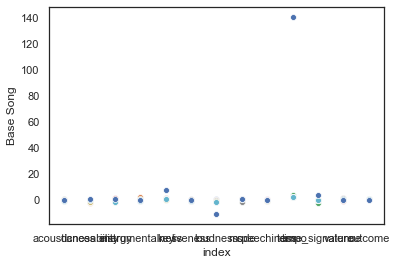

In [31]:


scatter0 = sns.scatterplot(x='index', y='Recomendation 1', data =extendend_result_for_plot)
scatter1 = sns.scatterplot(x='index', y='Recomendation 2', data =extendend_result_for_plot)
scatter2 = sns.scatterplot(x='index', y='Recomendation 3', data =extendend_result_for_plot)
scatter3 = sns.scatterplot(x='index', y='Recomendation 4', data =extendend_result_for_plot)
scatter4 = sns.scatterplot(x='index', y='Recomendation 5', data =extendend_result_for_plot)
scatter5 = sns.scatterplot(x='index', y='Recomendation 6', data =extendend_result_for_plot)
scatter6 = sns.scatterplot(x='index', y='Recomendation 7', data =extendend_result_for_plot)
scatter7 = sns.scatterplot(x='index', y='Recomendation 8', data =extendend_result_for_plot)
scatter8 = sns.scatterplot(x='index', y='Recomendation 9', data =extendend_result_for_plot)
scatter9 = sns.scatterplot(x='index', y='Recomendation 10', data =extendend_result_for_plot)
scatter10 = sns.scatterplot(x='index', y='Base Song', data =extendend_result_for_plot)

scatter0.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)


In [24]:
import seaborn as sns
sns.set(style="white")
# x = extendend_result.index.to_list()
# y1 = extendend_result.iloc[:,1]
# # y2 = extendend_result.iloc[0,:-1]
# # y3 = extendend_result.iloc[1,:-1]
# # y4 = extendend_result.iloc[2,:-1]
# # y5 = extendend_result.iloc[3,:-1]
# # y6 = extendend_result.iloc[4,:-1]
# # y7 = extendend_result.iloc[5,:-1]
# # y8 = extendend_result.iloc[6,:-1]
# # y9 = extendend_result.iloc[7,:-1]
# # y10 = extendend_result.iloc[8,:-1]
# # y11 = extendend_result.iloc[9,:-1]

sns.relplot(x, y1)



NameError: name 'x' is not defined

In [ ]:
mpg = sns.load_dataset("mpg")
m

In [ ]:
fig = go.Figure()

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Add traces
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[10,:],
                    mode='markers',
                    name='Actual fav'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[0,:],
                    mode='markers',
                    name='Recomendation 1'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[1,:],
                    mode='markers',
                    name='Recomendation 2'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[2,:],
                    mode='markers',
                    name='Recomendation 3'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[3,:],
                    mode='markers',
                    name='Recomendation 4'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[4,:],
                    mode='markers',
                    name='Recomendation 5'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[5,:],
                    mode='markers',
                    name='Recomendation 6'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 7'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 8'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 9'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 10'))

ply.plot(fig, filename='features', validate=True)